# QUESTION 3  Diabetes data

## 3.1

correlation matrix of exploratory variables
          AGE       SEX       BMI        BP        S1        S2        S3  \
AGE  1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181   
SEX  0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
BMI  0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
BP   0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
S1   0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
S2   0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
S3  -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
S4   0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
S5   0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
S6   0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   

           S4        S5        S6  
AGE  0.203841  0.270774  0.301731  
SEX  0.332115  0.149916  0.208133  


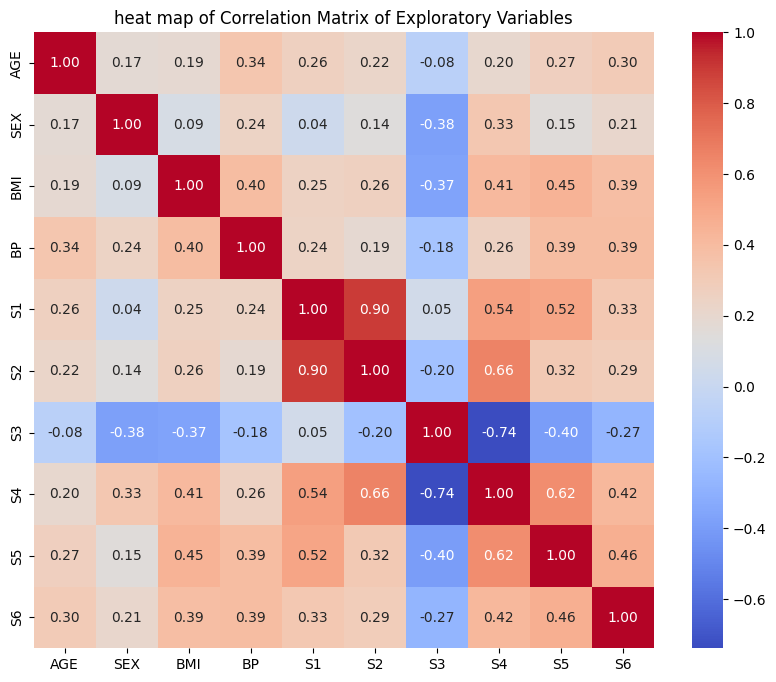

In [2]:
# import libraries
import pandas as pd # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
import statsmodels .api as sm # for regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# load data set
diabetes_data = pd.read_excel('Diabetes_Data.xlsx')

# explanatory variables
X = diabetes_data[['AGE','SEX','BMI','BP','S1','S2','S3','S4','S5','S6']]

# target variable
y = diabetes_data['Y']
# correlatio matrix of exploratory vriables
correlation_matrix = X.corr()
print("correlation matrix of exploratory variables")
print(correlation_matrix)

# heat map of the correlatin matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm')
plt.title('heat map of Correlation Matrix of Exploratory Variables')
plt.show()


## 3.3 Multivriate Linear Model  

In [4]:
X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print(model1.summary())

print()
# calculating mean squared error
y_pred = model1.predict(X)
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# adjusted R^2
adj_r2 = 1 - (1-model1.rsquared_adj)
print("Adjusted R^2:", adj_r2)

print()

# get p values
p_values = model1.pvalues
print("p values")
print(p_values)

alpha =  0.05

# compare p values to alpha
significance_results = p_values < alpha

# Print p-values and significance results
print("P-values:")
print(p_values)
print("\nSignificance (p < α):")
print(significance_results)


# Determine if all variables are significant
all_significant = significance_results.all()

if all_significant:
    print("\nAll variables are significant at α = 0.05.")
else:
    print("\nNot all variables are significant at α = 0.05.")

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 02 Nov 2024   Prob (F-statistic):           3.83e-62
Time:                        17:30:12   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.0

## 3.5 stepwise approach

In [6]:
def forward_regression(X, y, threshold_in=0.05):
    """Perform a forward feature selection based on p-value from statsmodels.api.OLS"""

    # Initialize variables
    initial_features = []    # List of selected features
    remaining_features = list(X.columns)  # List of remaining features
    selected_features = []    # List to keep track of features selected for the model

    while remaining_features:
        # Creating a dictionary to store p-values of remaining features
        pvals = pd.Series(index=remaining_features) 

        for feature in remaining_features: # Loop through remaining features
            # Fitting the model with the current set of initial features + the feature 
            model = sm.OLS(y, sm.add_constant(X[initial_features + [feature]])).fit() # Adding constant to the model
            pvals[feature] = model.pvalues[feature] # Getting the p-value of the feature 
        
        # Getting the feature with the lowest p-value
        min_p_value = pvals.min()

        # If the p-value is less than the threshold, add the feature to the model
        if min_p_value < threshold_in:
            best_feature = pvals.idxmin() # Getting the feature with the lowest p-value
            initial_features.append(best_feature) # Adding the feature to the initial features list
            remaining_features.remove(best_feature) # Removing the feature from the remaining features list
            selected_features.append(best_feature) # Adding the feature to the selected features list
            print(f"Adding {best_feature} with p-value {min_p_value:.4f}")
        else:
            break

    return selected_features # returning the selected features


selected_features = forward_regression(X, y) # Calling the function 

# Print the selected features
print("Selected features after forward regression:")
print(selected_features[1:])

# Fit the final model using the selected features
X_selected = sm.add_constant(X[selected_features]) # Adding a constant to the selected features
final_model = sm.OLS(y, X_selected).fit() # Fitting the  final model
# print coefficient and slope
print(" Final model coefficients:")
print(final_model.params)


# Predicting the values using the final model
y_pred = final_model.predict(X_selected)

# Calculating Mean Squared Error
mse = mean_squared_error(y, y_pred)

# Calculating R-squared
r_squared = r2_score(y, y_pred)

# Printing the results
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Adding const with p-value 0.0000
Adding BMI with p-value 0.0000
Adding S5 with p-value 0.0000
Adding BP with p-value 0.0000
Adding S1 with p-value 0.0015
Adding SEX with p-value 0.0092
Adding S2 with p-value 0.0003
Selected features after forward regression:
['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']
 Final model coefficients:
const   -313.766623
BMI        5.711107
S5        73.306526
BP         1.126553
S1        -1.042876
SEX      -21.591011
S2         0.843277
dtype: float64
Mean Squared Error: 2876.683251787016
R-squared: 0.5148837959256445


## analyzing titanic dataset 